<a href="https://colab.research.google.com/github/Abiti0233/wordcloud/blob/main/%E3%83%AF%E3%83%BC%E3%83%89%E3%82%AF%E3%83%A9%E3%82%A6%E3%83%89%E4%BD%9C%E6%88%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-noto-cjk is already the newest version (1:20220127+repack1-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Apple 米国太平洋夏時間 スマートフォン iPhone 16 シリーズ 日本 AppleStore Web 店頭 販売予約 受付 iPhone16 iPhone16Plus モデル ディスプレイ ピーク輝度 視認性 販売価格 外観 アウトカメラ 配列 機能 アクションボタン カメラ クイック起動 ズーム倍率 調整 カメラコントロール 画素 超広角 メイン デュアル構成 FusionCamera 望遠 動画撮影 SpacialVideo 空間ビデオ 収録 ボディーカラー ブラック ホワイト ピンク ティール ウルトラマリン iPhone 16Pro iPhone 16 Pro Max Proモデル 狭額縁化 トリプル構成 4K ピクセル fps チタニウム AppleIntelligence 文章 作成支援 画像 Siri テキスト 会話 日本語 藤田文武 幹事長 記者会見 兵庫県 斎藤元彦 知事 辞職要求 理由 出直し選 選挙 県民 判断 党 対応 県政 停滞 指摘 規制 教育 無償化 政策 実績 立場 象徴 知事選 自民党 推薦 衆院選 比例復活 公認候補 当選 県議選 議席 会派 告発文書 疑惑 維新県議団 調査特別委員会 百条委 設置 片山安孝 副知事 辞意 自民県連 事実 解明 優先 大阪府 箕面市長選 地域政党 大阪維新の会 現職 大敗 衆院選 懸念 地元 兵庫維新の会 協議 証人尋問 内容 党 対応 修正 立憲民主党 県議 ひょうご県民連合 不信

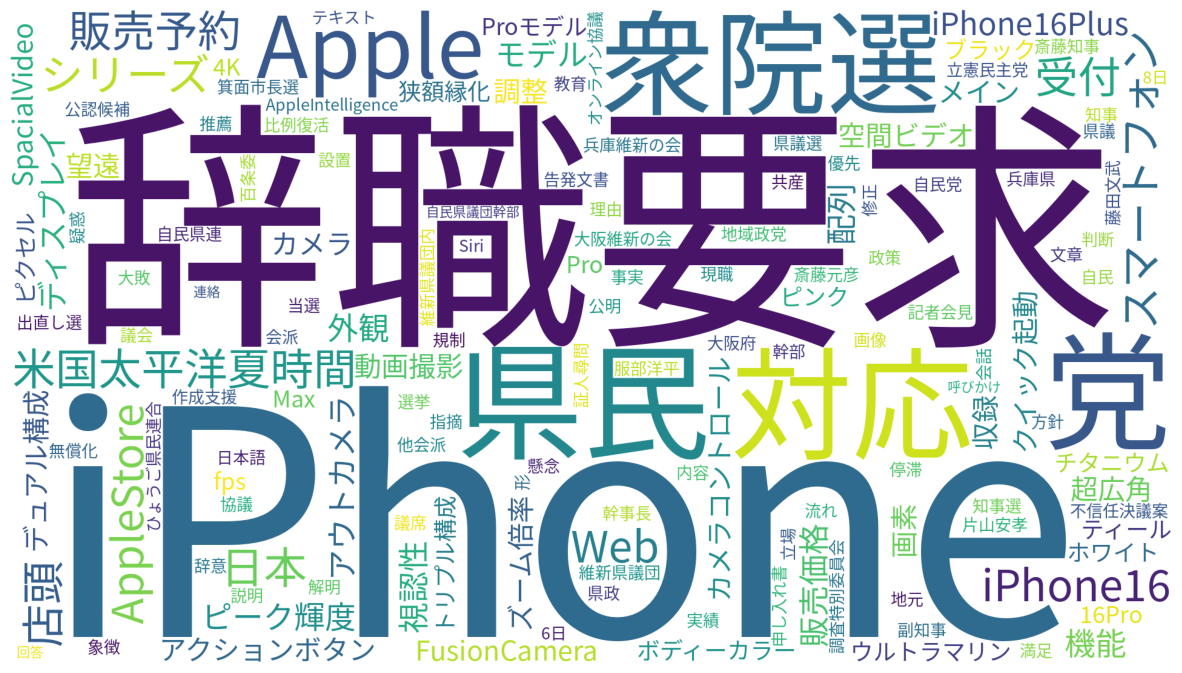

In [14]:
# 必要なライブラリのインストール
!pip install mecab-python3==0.7
!pip install wordcloud
!apt-get install fonts-noto-cjk -y

# 必要なライブラリのインポート
import MeCab
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import codecs
from google.colab import drive

# Google Driveをマウント
drive.mount('/content/drive')

# stop_wordsの設定
stop_words = [u'てる', u'いる', u'なる', u'れる', u'する', u'ある', u'こと', u'これ', u'さん', u'して',
              u'くれる', u'やる', u'くださる', u'そう', u'せる', u'した', u'思う', u'すぎ', u'ため',
              u'それ', u'ここ', u'である', u'だ', u'', u'て', u'に', u'を', u'は', u'の', u'が', u'と', u'た', u'し', u'で',
              u'ない', u'も', u'な', u'い', u'か', u'ので', u'']

# フォントファイルのパスを指定
fpath = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'

# 解析したい文章を入力
text = ('Apple, 米国太平洋夏時間, スマートフォン, iPhone 16, シリーズ, 日本, AppleStore, Web, 店頭, 販売予約, 受付, iPhone16, iPhone16Plus, モデル, ディスプレイ, ピーク輝度, 視認性, 販売価格, 外観, アウトカメラ, 配列, 機能, アクションボタン, カメラ, クイック起動, ズーム倍率, 調整, カメラコントロール, 画素, 超広角, メイン, デュアル構成, FusionCamera, 望遠, 動画撮影, SpacialVideo, 空間ビデオ, 収録, ボディーカラー, ブラック, ホワイト, ピンク, ティール, ウルトラマリン, iPhone 16Pro, iPhone 16 Pro Max, Proモデル, 狭額縁化, トリプル構成, 4K, ピクセル, fps, チタニウム, AppleIntelligence, 文章, 作成支援, 画像, Siri, テキスト, 会話, 日本語, 藤田文武, 幹事長, 記者会見, 兵庫県, 斎藤元彦, 知事, 辞職要求, 理由, 出直し選, 選挙, 県民, 判断, 党, 対応, 県政, 停滞, 指摘, 規制, 教育, 無償化, 政策, 実績, 立場, 象徴, 知事選, 自民党, 推薦, 衆院選, 比例復活, 公認候補, 当選, 県議選, 議席, 会派, 告発文書, 疑惑, 維新県議団, 調査特別委員会, 百条委, 設置, 片山安孝, 副知事, 辞意, 自民県連, 事実, 解明, 優先, 大阪府, 箕面市長選, 地域政党, 大阪維新の会, 現職, 大敗, 衆院選, 懸念, 地元, 兵庫維新の会, 協議, 証人尋問, 内容, 党, 対応, 修正, 立憲民主党, 県議, ひょうご県民連合, 不信任決議案, 他会派, 維新県議団内, 幹部, 6日, 自民, 公明, 共産, 方針, 流れ, 辞職要求, 8日, オンライン協議, 形, 斎藤知事, 説明, 議会, 県民, 満足, 申し入れ書, 服部洋平, 自民県議団幹部, 呼びかけ, 回答, 連絡.')

# テキストの前処理
words = [word.strip() for word in text.split(',')]
wc_text = ' '.join(words)

print(wc_text)  # 分かち書き＆品詞の分類の表示

# ワードクラウドの生成
wordcloud = WordCloud(font_path=fpath,
                      background_color="white",
                      width=1920, height=1080,
                      stopwords=set(stop_words)).generate(wc_text)

# プロットの設定
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")

# 画像をGoogle Driveに保存
plt.savefig('/content/drive/My Drive/word_cloud.png')
print("ワードクラウド画像がGoogle Driveに保存されました。")

# ZIPファイルの作成と保存（オプション）
import zipfile
import os

zip_filename = '/content/drive/My Drive/word_cloud.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    zipf.write('/content/drive/My Drive/word_cloud.png', arcname='word_cloud.png')

print("ZIPファイルがGoogle Driveに保存されました。")

# ファイルサイズの確認
!ls -lh /content/drive/My\ Drive/word_cloud.png /content/drive/My\ Drive/word_cloud.zip